In [3]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [0]:
import os
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')
os.chdir('drive/My Drive/')

E: Package 'python-software-properties' has no installation candidate
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/


In [11]:
with open("fer2013/fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [13]:
import pandas as pd
p1=pd.read_csv('fer2013/fer2013.csv')

In [14]:
p1.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5

In [0]:
x_train, y_train, x_test, y_test = [], [], [], []

In [0]:
for i in range(1,num_of_instances):
    
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
 
  

In [0]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [0]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

ValueError: ignored

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_3 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 128)         147584    
__________

In [0]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')
checkpointer = ModelCheckpoint(filepath='weights_dip.best.eda.hdf5', verbose=1, save_best_only=True)

In [0]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=256, callbacks=[checkpointer], verbose=1)

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 253s 9ms/step - loss: 1.8235 - acc: 0.2474 - val_loss: 1.8066 - val_acc: 0.2516

Epoch 00001: val_loss improved from inf to 1.80664, saving model to weights_dip.best.eda.hdf5
Epoch 2/30
28709/28709 [==============================] - 250s 9ms/step - loss: 1.7812 - acc: 0.2573 - val_loss: 1.7324 - val_acc: 0.2962

Epoch 00002: val_loss improved from 1.80664 to 1.73237, saving model to weights_dip.best.eda.hdf5
Epoch 3/30
28709/28709 [==============================] - 249s 9ms/step - loss: 1.6834 - acc: 0.3179 - val_loss: 1.6526 - val_acc: 0.3419

Epoch 00003: val_loss improved from 1.73237 to 1.65262, saving model to weights_dip.best.eda.hdf5
Epoch 4/30
28709/28709 [==============================] - 250s 9ms/step - loss: 1.5961 - acc: 0.3667 - val_loss: 1.5518 - val_acc: 0.3937

Epoch 00004: val_loss improved from 1.65262 to 1.55176, saving model to weights_dip.best.eda.hdf5
Epoch 5

In [0]:
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

3589/3589 [==============================] - 9s 2ms/step
Test loss: 1.180547374475298
Test accuracy: 58.59570911200341


In [0]:
model.save('models/emotion_model.hdf5')

In [1]:
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [2]:
monitor_testset_results = False
from keras.models import load_model
model = load_model('emotion_model.hdf5')

if monitor_testset_results == True:
	
	predictions = model.predict(x_test)
  
  

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1


Using TensorFlow backend.


C:\Users\andro\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


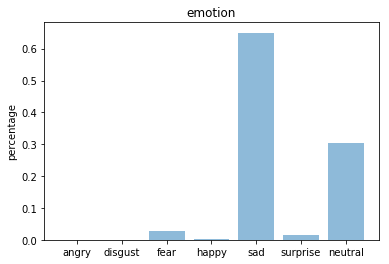

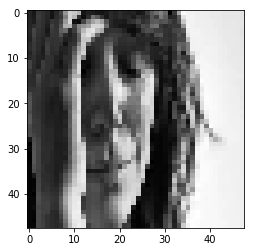

In [4]:

img = image.load_img("sad1.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()